# Applied Machine Learning: Assignment \#1

### Sheetal Parikh
EN.605.631.81<br>
January 31, 2021
***
***

## Problem 1
*Define each of the following Machine Learning Terms:*
- *dataset*
- *training, testing, validation dataset* 
- *groundtruth, label* 
- *pre-processing, feature, numerical, nominal* 
- *decision surface* 
- *model validation, accuracy, cross-validation* 

- dataset - A dataset is a collection of data. The data can be the information stored in one database table or matrix in which the columns are the variables and each row is an instance or observation.

- training, testing, validation dataset - The training set is used to train the model for the best fit.  The algorithm learns from the training set to better identify the target.  The validation data set is used on the training set to evaluate the model's accuracy and fine tune the hyperparameters.  The test set is used as a final test of the model fit. This set of data was partitioned out at the very start and is untouched.  The test set represents the real world data.

- groundtruth, label - The ground truth is the “real world” result that you want your model to predict. A label is the target which explains the piece of data and is what our model is predicting.

- preprocessing, feature, numerical, nominal -  In pre-processing the data set is prepared for modeling.  It is considered the most important and time consuming step since if the data is not prepared correctly, the model will not be as an accurate fit of the real world data.  Important steps of pre-processing include removing noise from data to compress the data, identifying if there is missing data and determining the datatypes of the features included in the dataset.  Features are the target or predictor variables and are the input or a system.  They are the columns of a data table or data design matrix.  It is important to identify the datatypes because different steps to pre-process the data can be taken depending on whether features are numerical(ex. Log transformation or outlier removal) or nominal(transforming categorical data to numerical).  Numerical features are represented by numbers and usually a measurement or a count and floating points or integers. Nominal data are discrete values with no ordering and are typically text values in the dataset. Examples of nominal data are nationality, species, food, etc.

- decision surface - A decision surface is a visualization of how a model predicts by dividing the input data by class.  It can show where the model over or under fits the data. 

- model validation, accuracy, cross-validation -  Model validation is the process of evaluating a testing data set with a trained model.  Through model validation we want to confirm whether the model works as expected and is accurate.  The results of the model are compared with real world data to confirm the performance.  A model has accuracy if it very closely predicts the test data to the real world data.  Cross-validation is used to make sure that a model is not over-fitted which can produce inaccurate results.  In cross-validation the dataset is divided into training and validation subsets (as defined above). 

## Problem 2
*Pick two of the Scikit-learn datasets which are already included in your library (i.e. the one with datasets_load_) and* *find out the following:*

- *the number of data points*
- *the number of features and their types*
- *the number and name of categories(i.e. the target field)*
- *the mean (or mode if nominal) of the first two features*

#### Breast Cancer Dataset
- number of data points: 569
- number of features: 50
- datatype of features: positive double precision floating point
- 2 categories: Malignant and Benign
- Mean of 1st two Features: 14.1273 , 19.2896

#### Wine Dataset
- number of data points: 178
- number of features: 13
- datatype of features: positive double precision floating point
- 3 categories: class_0, class_1, class_2
- Mean of 1st two Features: 13.0006 , 2.3363

In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

#imports for Problem 3
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn.datasets
import pandas as pd

#imports for Problem 5
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 

In [2]:
#loading breast cancer dataset
bcancer = datasets.load_breast_cancer()

print(bcancer)

# Print out the target values
#print(bcancer.target)

# Print out the description of the cancer data - includes datapoints, features, and categories
print(bcancer.DESCR)

#putting data into dataframe
bcancer_df = pd.DataFrame(np.c_[bcancer['data'], bcancer['target']], 
                          columns = np.append(bcancer['feature_names'], ['target']))


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
#checking data type
print(bcancer_df.dtypes)

#calculating mean of first two features
bcancer_mean0 = bcancer_df["mean radius"].mean()
bcancer_mean1 = bcancer_df["mean texture"].mean()

#printing mean of first two features
print("")
print("Mean of Mean Radius:", bcancer_mean0)
print("Mean of Mean Texture:", bcancer_mean1)



mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [4]:
#loading wine dataset
wine = datasets.load_wine()

print(wine)

# Print out the description of the wine data - includes datapoints, features, and categories
print(wine.DESCR)

#putting dataset into dataframe
df = pd.DataFrame(np.c_[wine['data'], wine['target']],
                  columns= np.append(wine['feature_names'], ['target']))


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [5]:
#printing datatypes
print(df.dtypes)

#calculating mean of first two features
wine_mean0 = df["alcohol"].mean()
wine_mean1 = df["malic_acid"].mean()

print("")
print("Mean of alcohol:", wine_mean0)
print("Mean of malic_acid:",wine_mean1)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Mean of alcohol: 13.000617977528083
Mean of malic_acid: 2.336348314606741


## Problem 3
*Use the following code piece to display feature pairs:*

*import numpy as np*
<br>*import seaborn as sns; sns.set(style="ticks", color_codes=True)*
<br>*import sklearn.datasets*
<br>*import pandas as pd*
<br>*iris = sklearn.datasets.load_iris()*
<br>*iris_df = pd.DataFrame(*
 <br>*data= np.c_[iris.data, [iris.target_names[v] for v in*
<br>*iris.target]],*
 <br>*columns= iris.feature_names + ['species'])*
<br>*cols = iris_df.columns.drop('species')*
<br>*iris_df[cols] = iris_df[cols].apply(pd.to_numeric)*
<br>*g = sns.pairplot(iris_df, hue='species')*

*From the plots, which feature(s) shows the most promising discriminating power for
*machine learning?*
<br><br>*Now plot the features for the datasets you tried in question 2, hoping the number of*
*features are low and plots look not too small. If there are too many features, then switch the*
*dataset or update your code (pandas Dataframe line) to look at low number of features at a*
*time.*

#### Iris Dataset
From the plots below, petal length and petal width show the most promising discriminating power for machine learning since they have the least overlapping points. If unknown data was evaluated using a machine learning model from the Iris dataset, features with more discriminatory power would help us better determine from which flower the unknown data belonged.

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

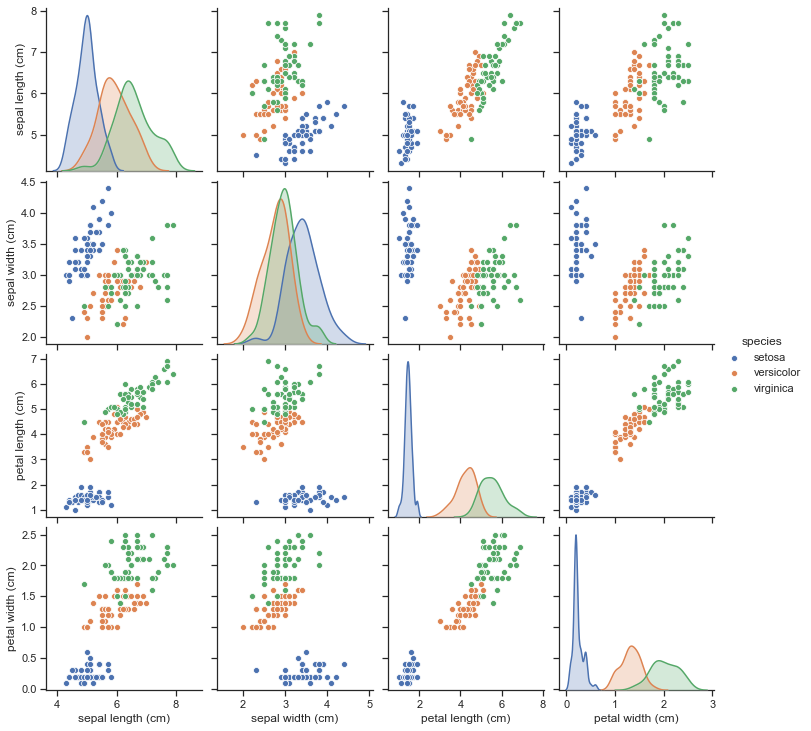

In [6]:
#displaying feature pairs using code from module 1 notebook
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
data= np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
    columns= iris.feature_names + ['species'])
cols = iris_df.columns.drop('species')
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue='species')

print(iris_df)

#### Wine Dataset

The wine dataset includes 13 features. Pairs plots with all 13 features were first plotted to visualize if some features that had increased overlapping could be removed.  The following features were removed: ash, magnesium, proanthocyanins, nonflavanoid_phenols, and alcalinity_of_ash.  From the remaining features, proline, color-intensity, and flavanoids appear to have the most promising discriminating power.


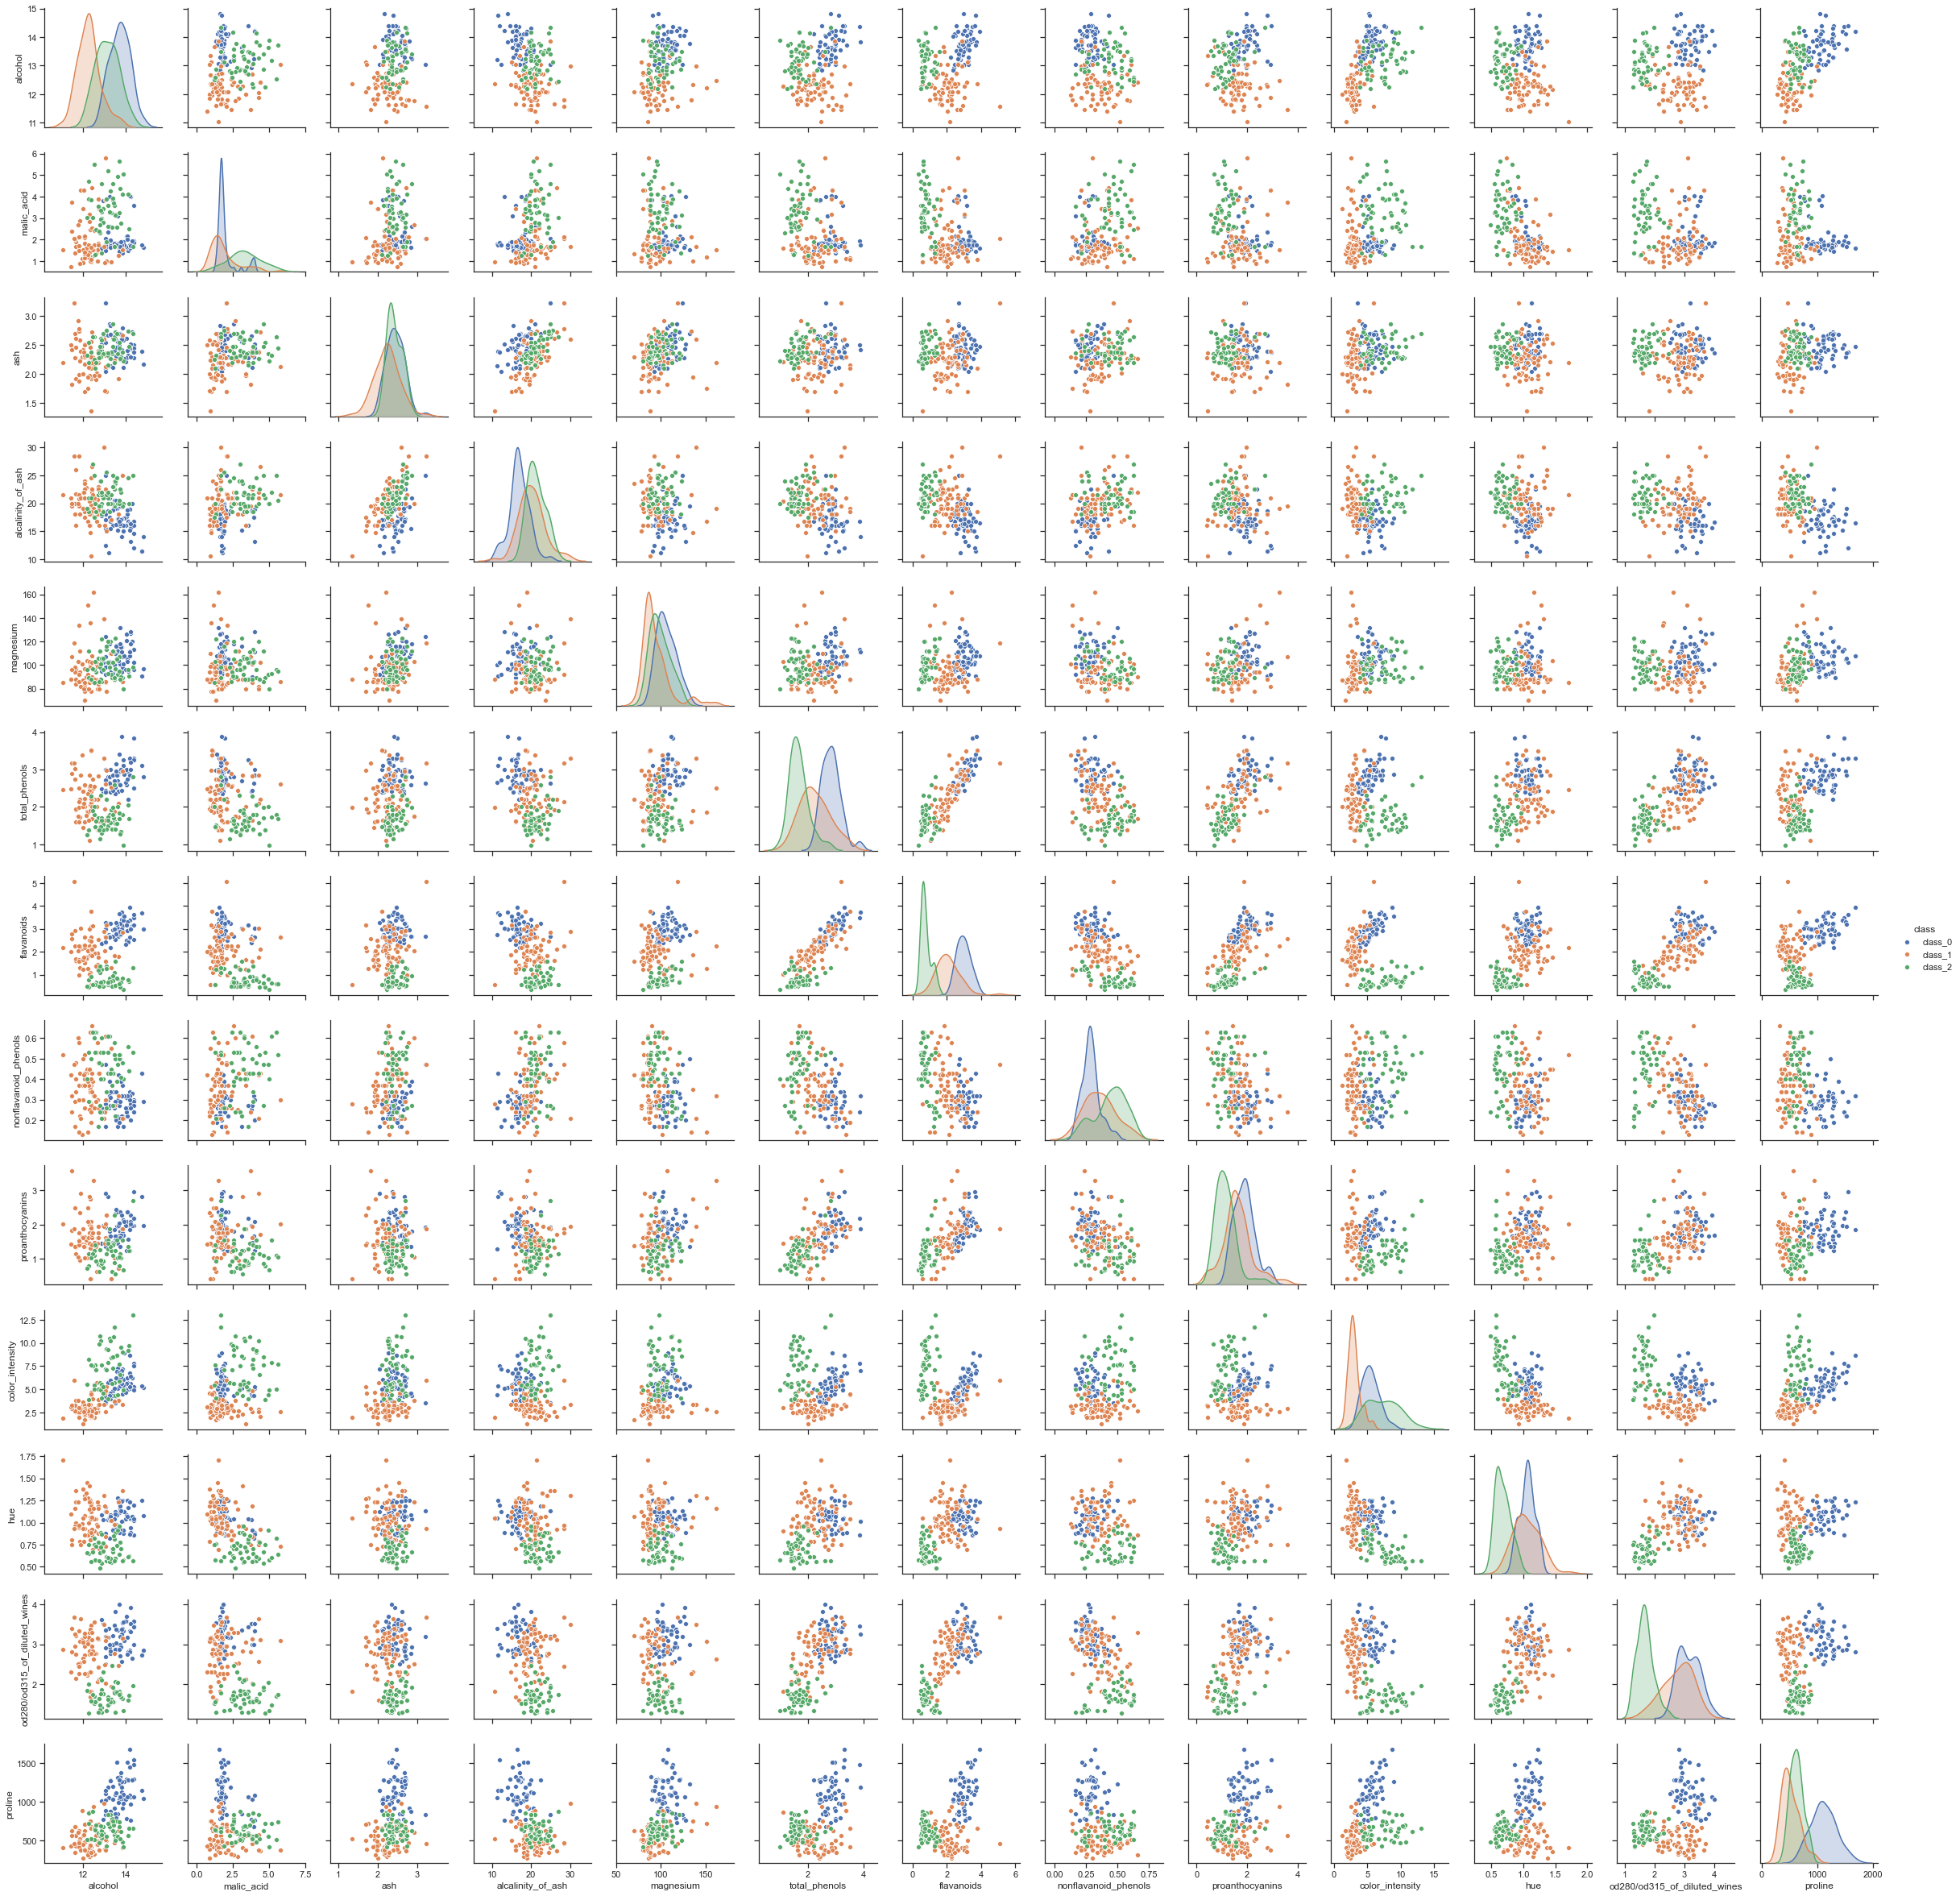

In [7]:
#dataframe of wine dataset
wine_df = pd.DataFrame(data = np.c_[wine.data, [wine.target_names[v] for v in wine.target]],
    columns= wine.feature_names + ['class'])
#plotting all features
cols = wine_df.columns.drop('class')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
g = sns.pairplot(wine_df, hue='class')

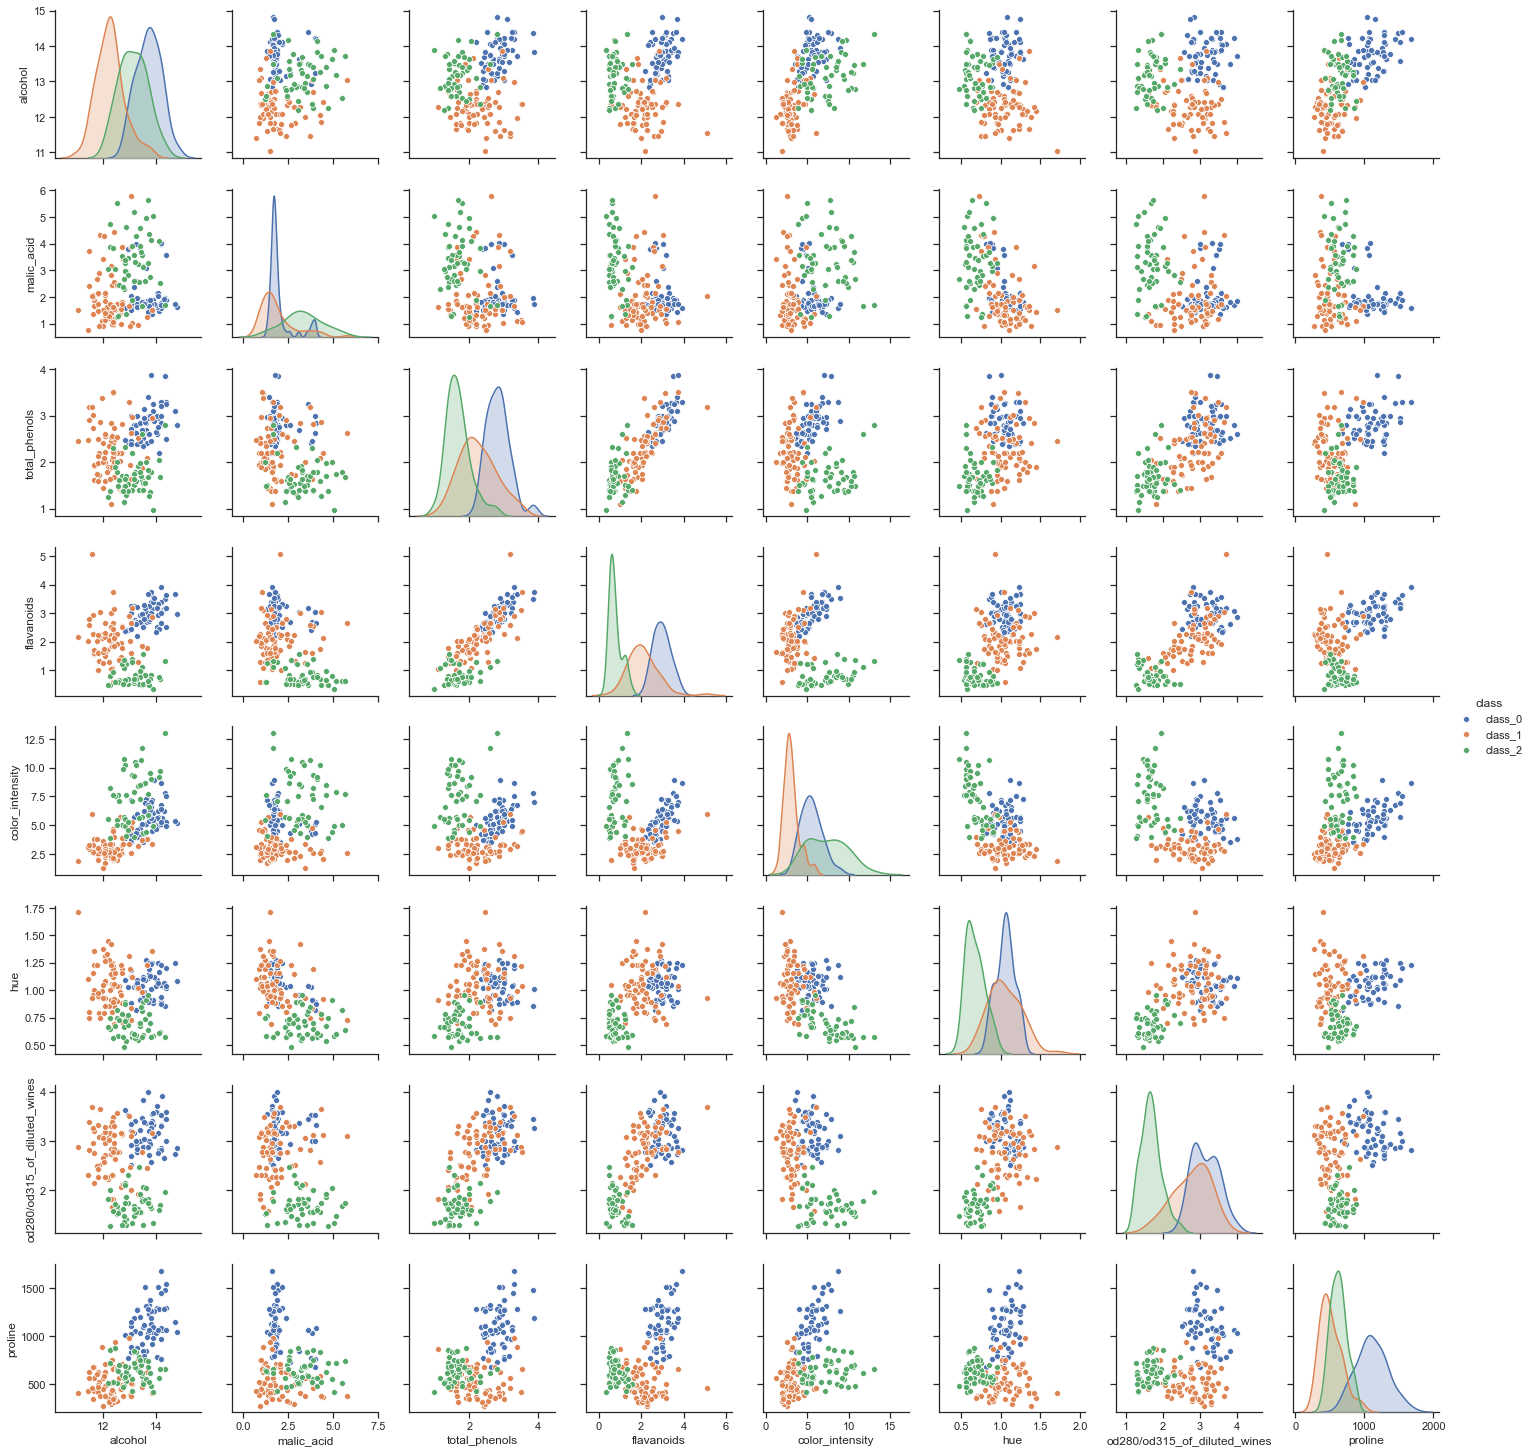

In [8]:
wine_df = pd.DataFrame(data = np.c_[wine.data, [wine.target_names[v] for v in wine.target]],
    columns= wine.feature_names + ['class'])
#removing features with  more overlapping
wine_df = wine_df.drop(['ash', 'magnesium', 'proanthocyanins', 'nonflavanoid_phenols', 'alcalinity_of_ash'], axis = 1)
cols = wine_df.columns.drop('class')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
g = sns.pairplot(wine_df, hue='class')

#### Breast Cancer Dataset

The breast cancer dataset includes 30 features.  In order to better visualize the plots, the features were grouped into three sections(mean, standard error, and worst) rather than plotting all the features together.  From the plots it is difficult to determine which features show the most promising discriminating power.  However, we can see other patterns.  For example, in the mean and worst pair plots we can see that malignant(0) tumors generally have a wider range of values compared to benign(1) tumors.  Also, in the standard pair plots, we can see that malignant and benign tumors have very similar standard errors. 

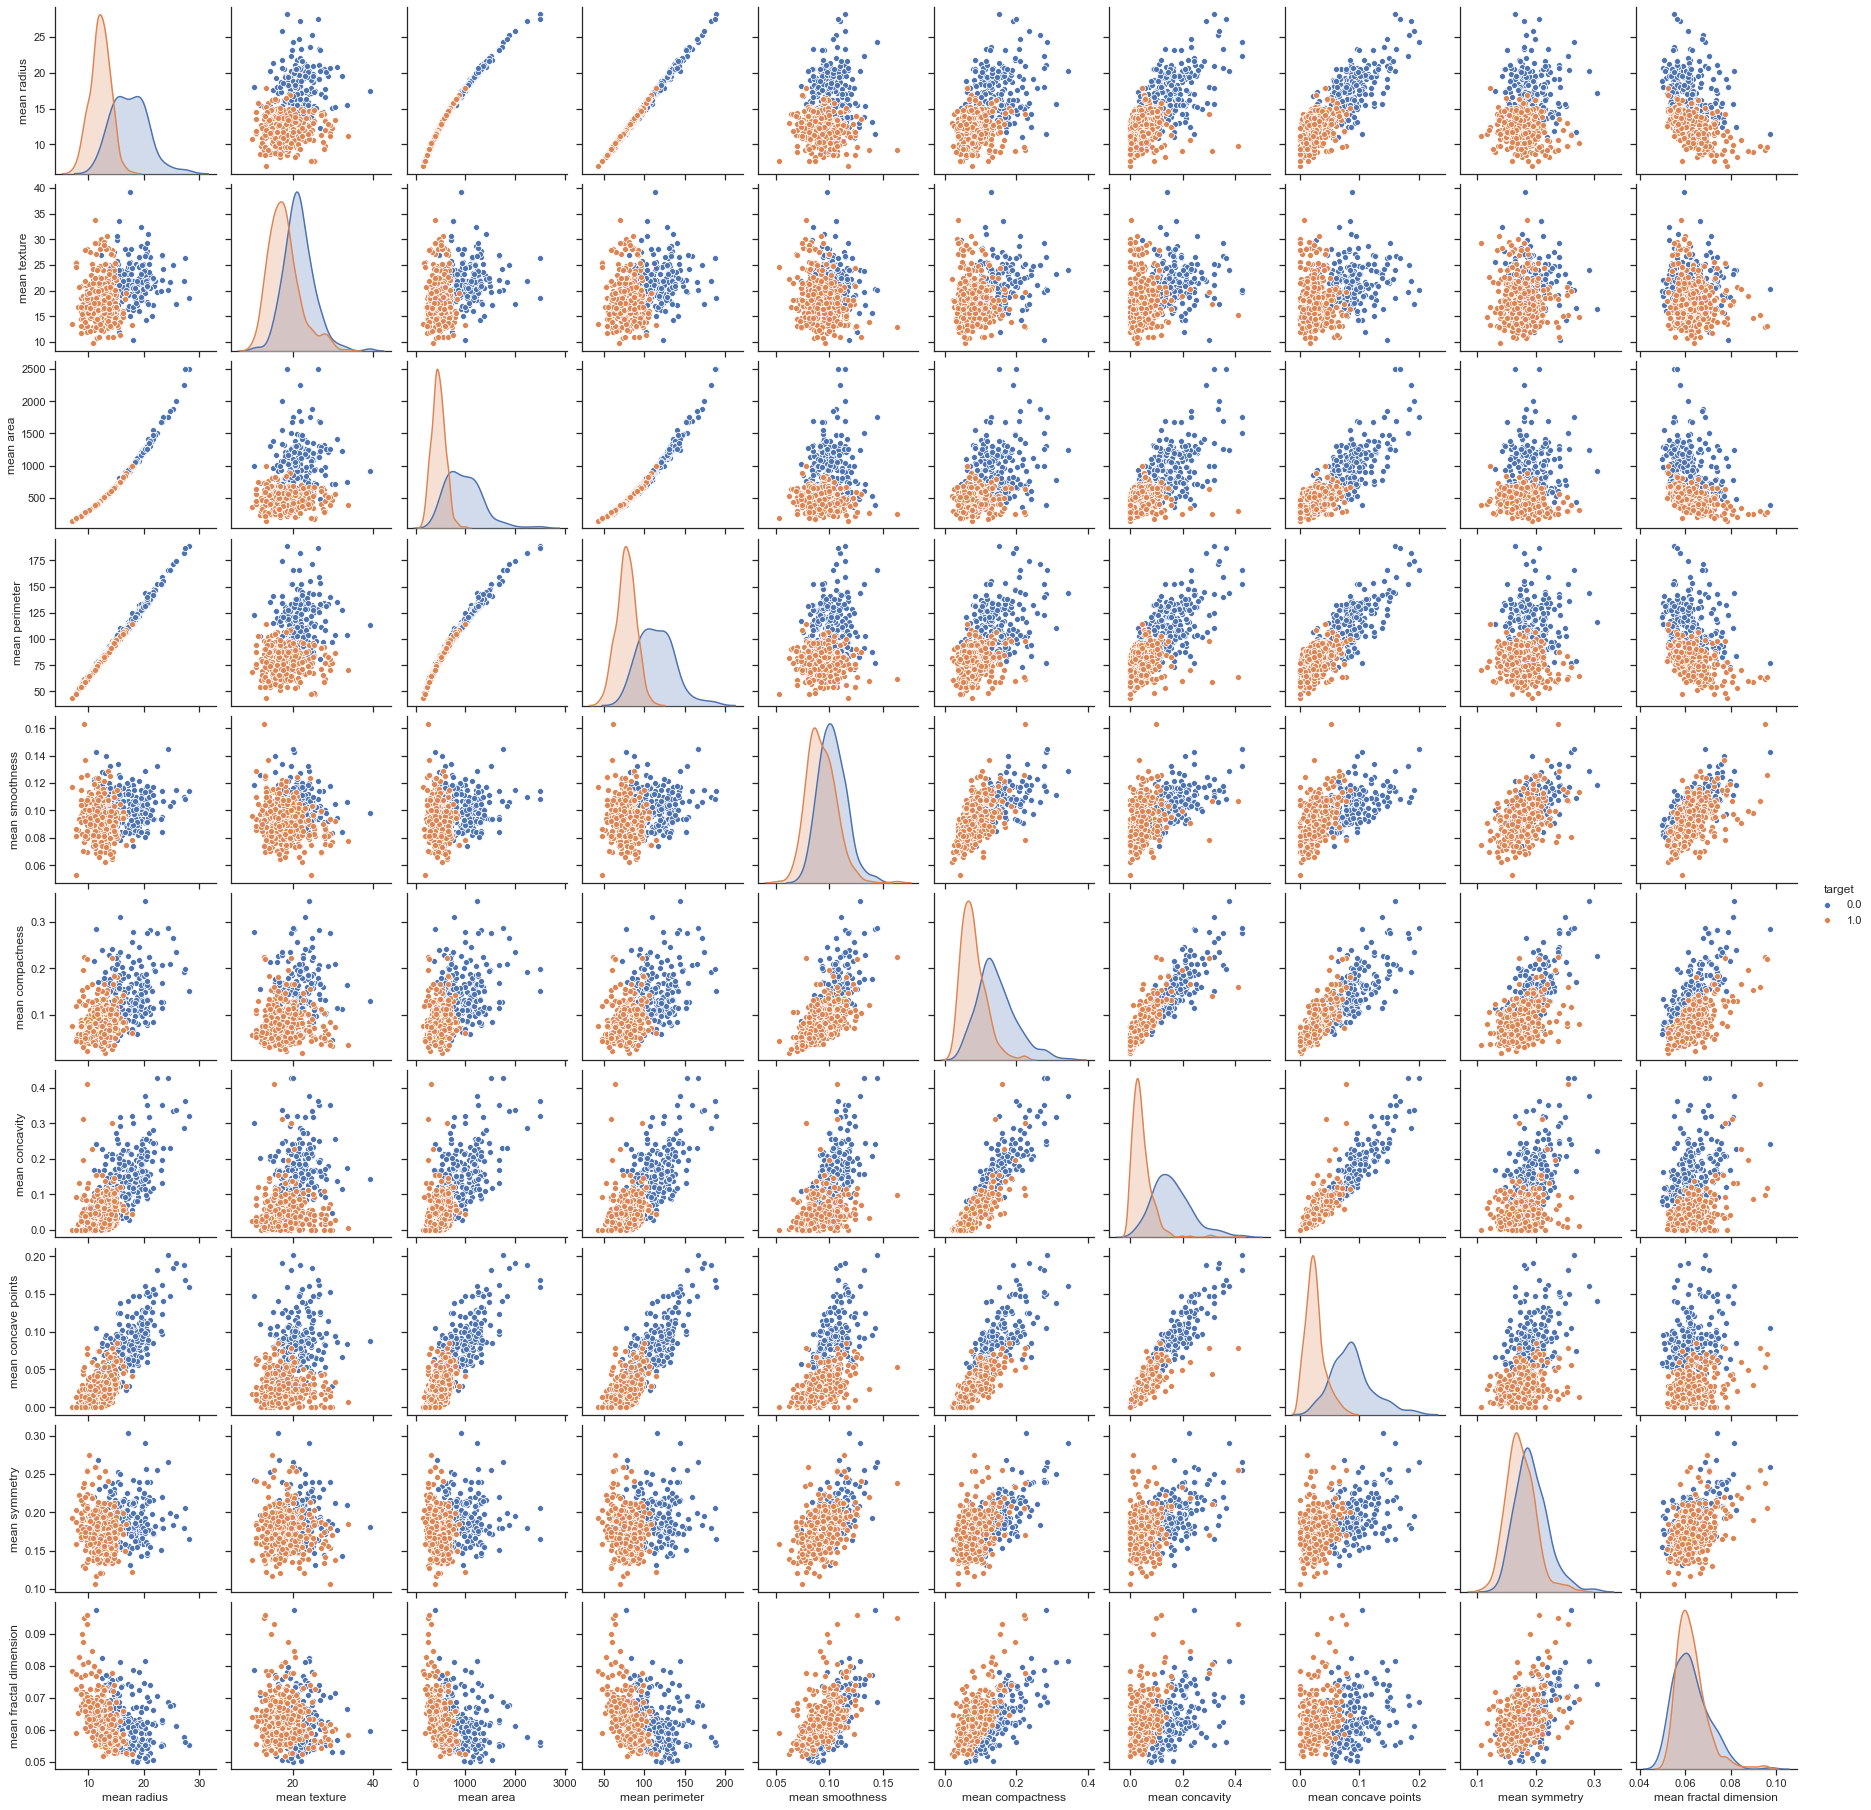

In [9]:
#putting dataset into dataframe
bcancer_df = pd.DataFrame(np.c_[bcancer['data'], bcancer['target']], 
                          columns = np.append(bcancer['feature_names'], ['target']))
#bcancer_df.head()

#plotting data mean data
sns.pairplot(bcancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 
    'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points',
    'mean symmetry', 'mean fractal dimension'])


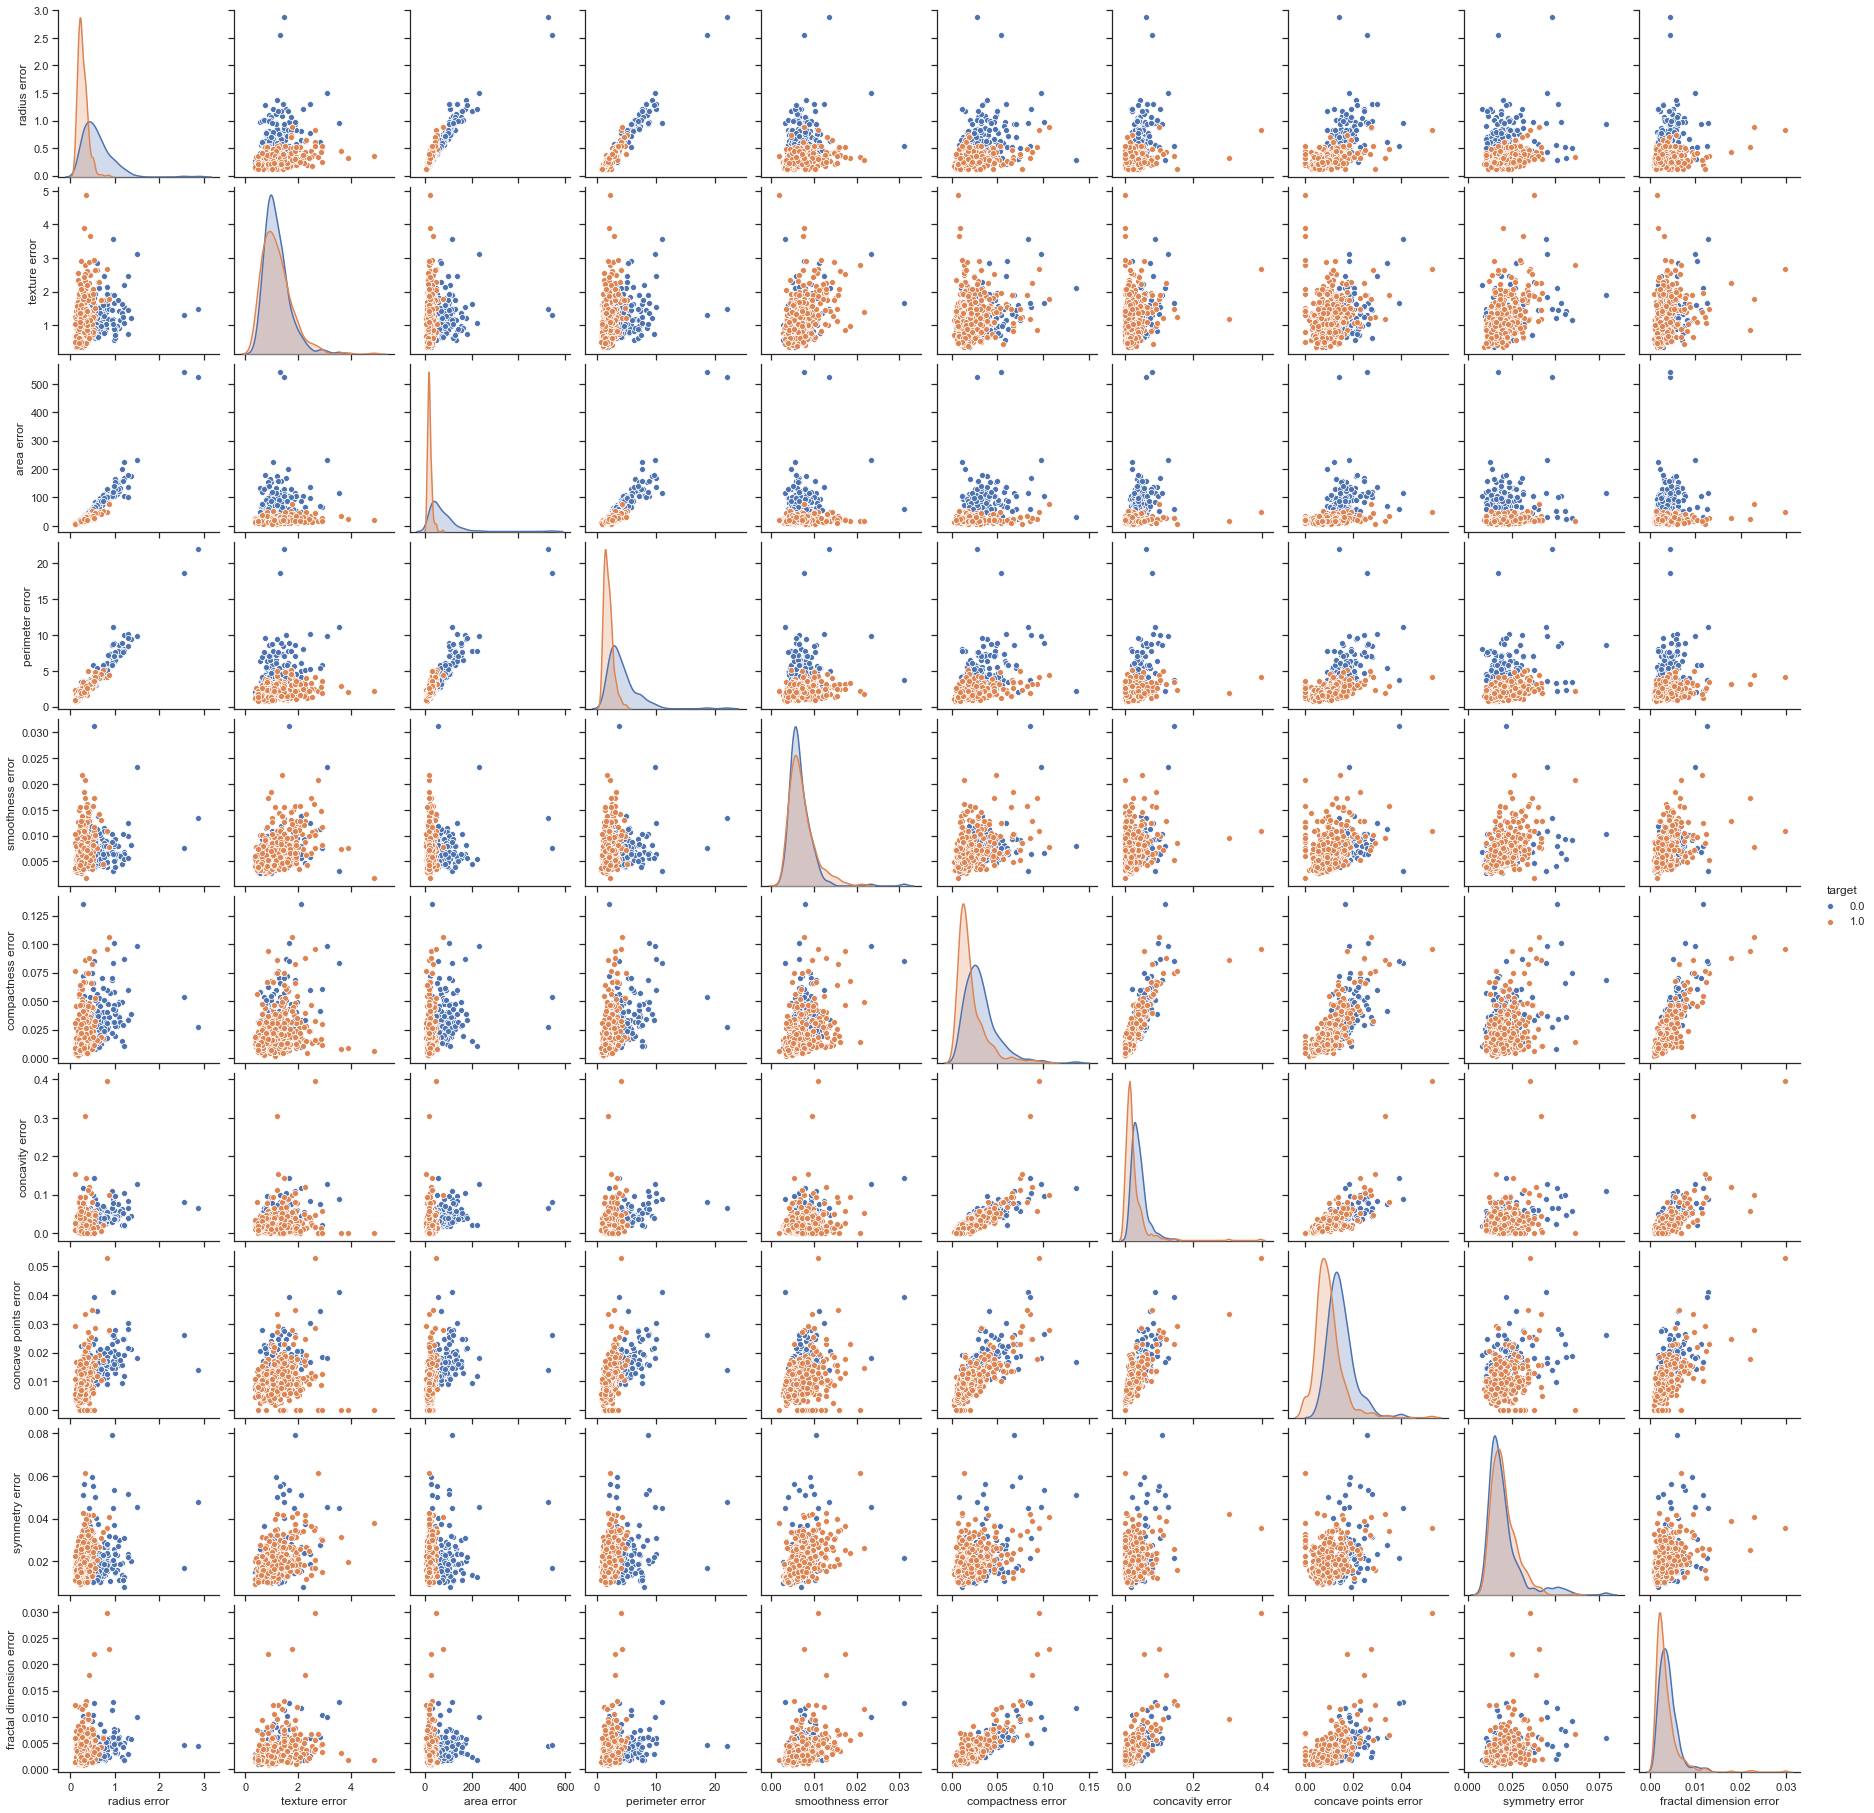

In [10]:
#plotting standard error data

sns.pairplot(bcancer_df, hue = 'target', vars = ['radius error', 'texture error', 
    'area error', 'perimeter error', 'smoothness error', 'compactness error', 
    'concavity error', 'concave points error','symmetry error', 
    'fractal dimension error'])

#list(bcancer_df)

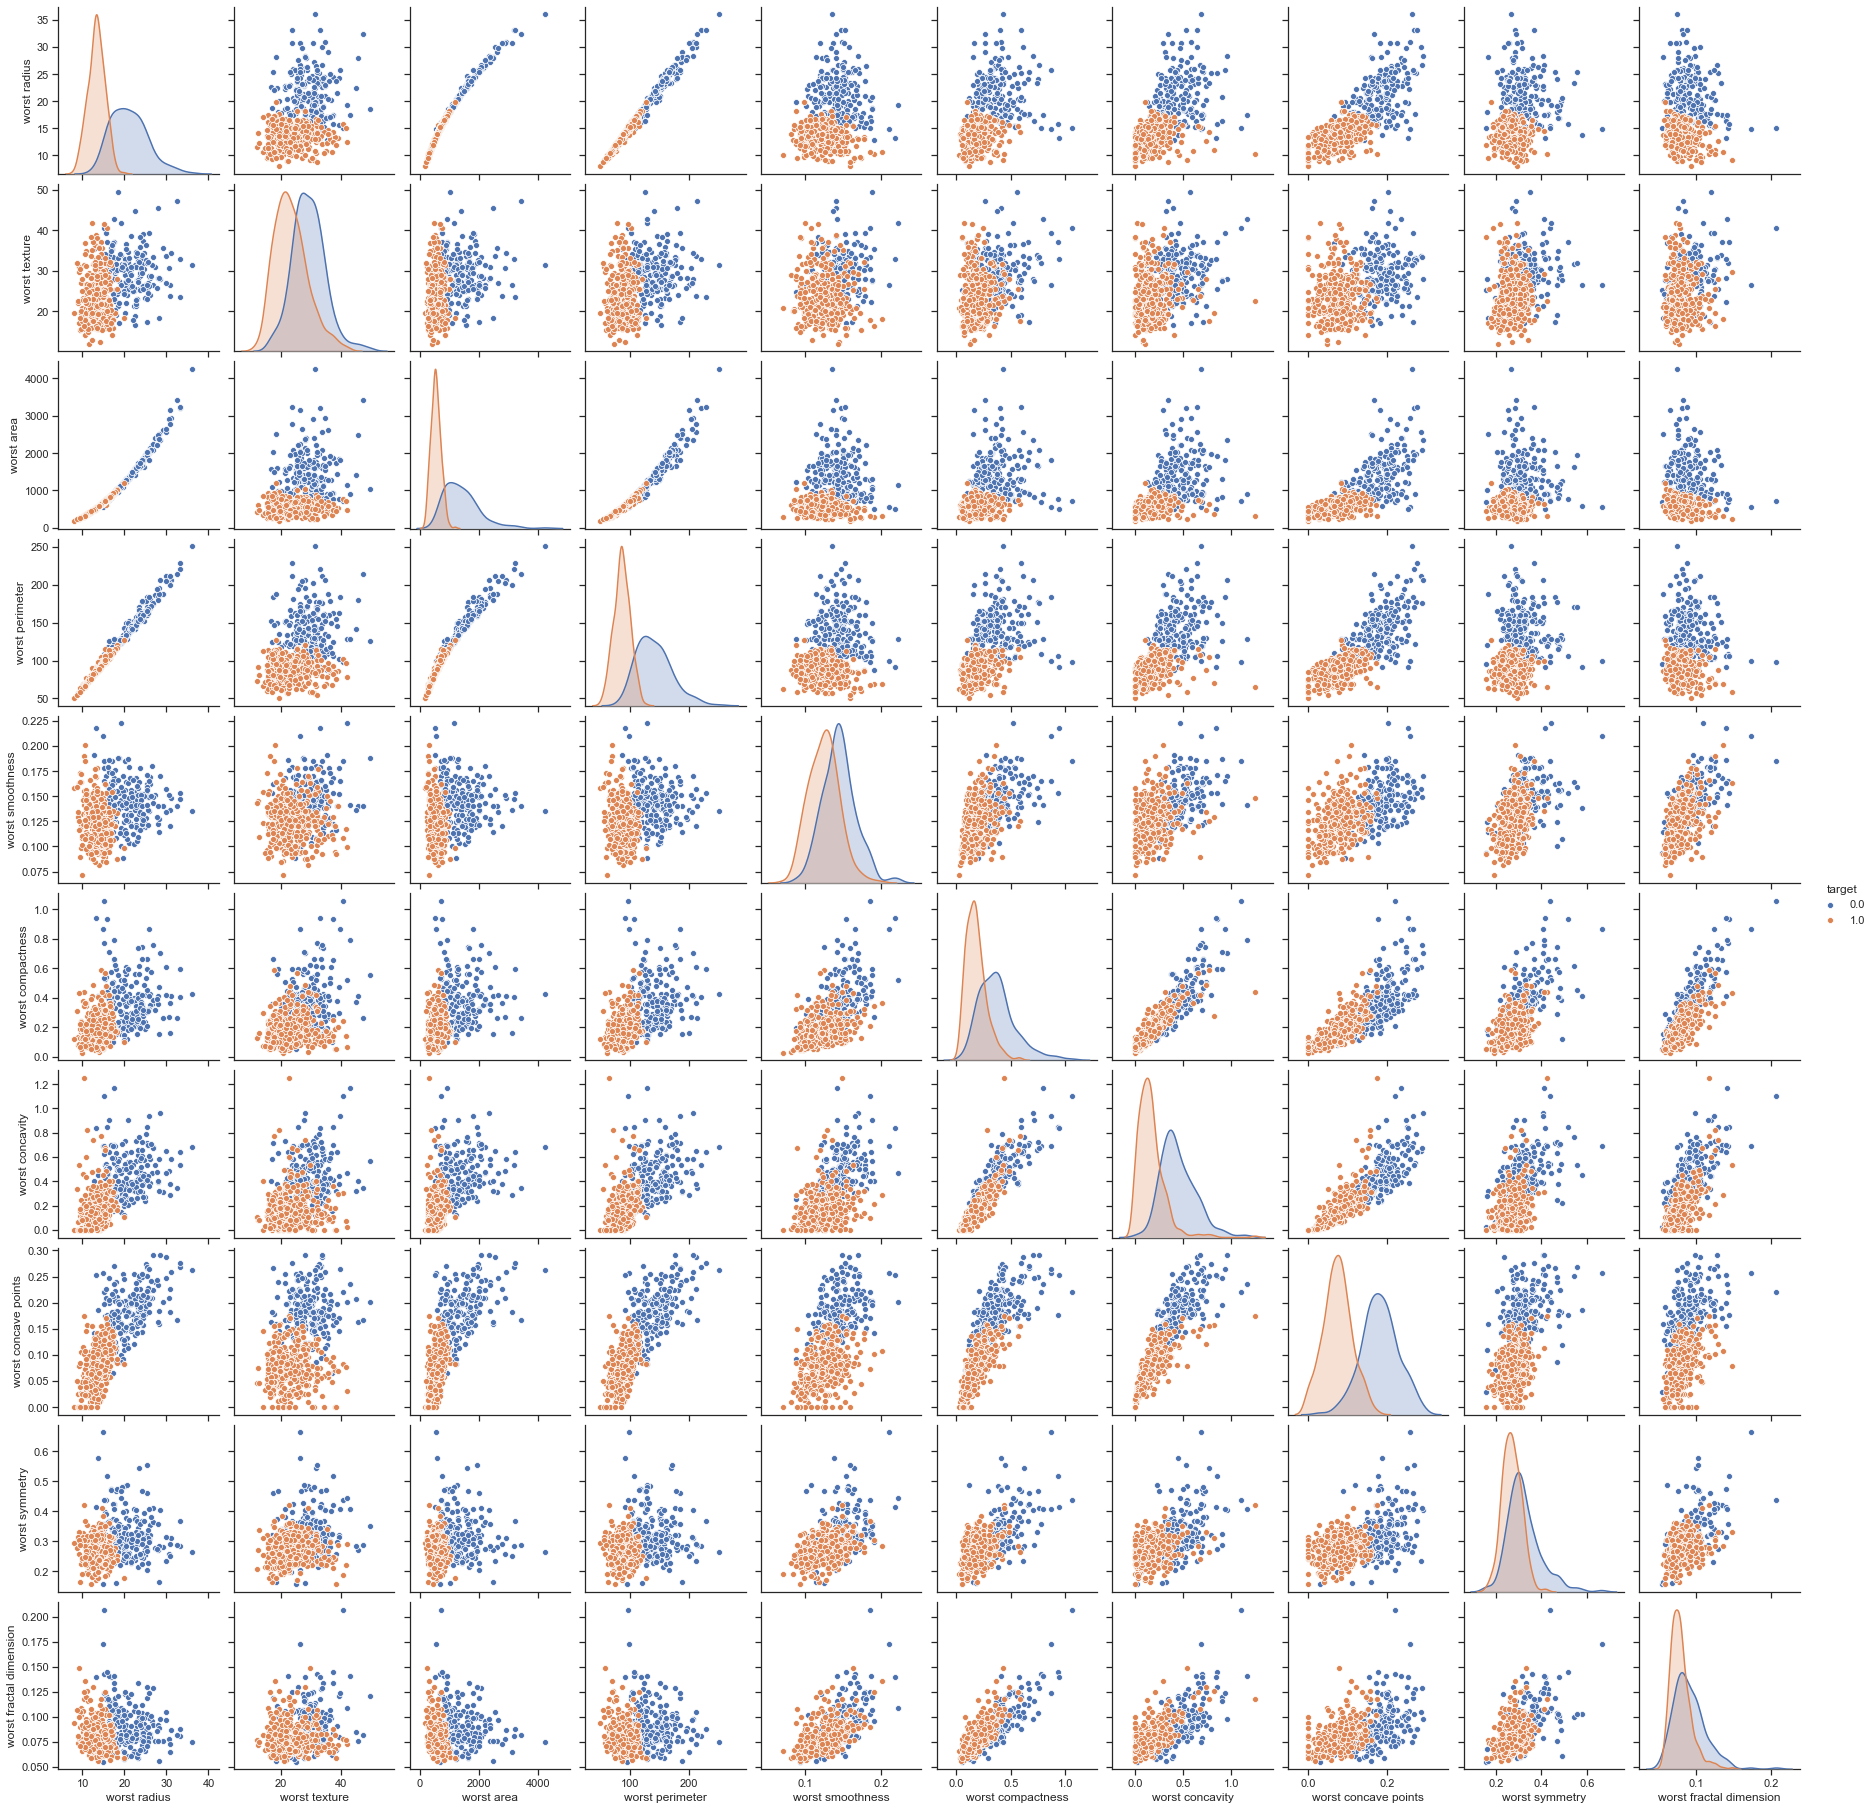

In [11]:
#plotting worst data

sns.pairplot(bcancer_df, hue = 'target', vars = ['worst radius', 'worst texture', 
    'worst area', 'worst perimeter', 'worst smoothness', 'worst compactness', 
    'worst concavity', 'worst concave points','worst symmetry', 
    'worst fractal dimension'])

#list(bcancer_df)

## Problem 4
*Refer to the plots in the previous question and discuss an unsupervised approach to group the dataset into non-overlapping clusters.* 
<br><br>*Answer the following questions:*
- *Which features would you use?*
- *Are three clusters obvious?*
- *What about four clusters? Roughly mark them on a few plots.*
- *For this problem, is there any relation between classification and clustering since the labels are already given?*

In an unsupervised approach we can explore the structure of our data without the knowledge of labels.  One such approach called clustering, allows us to organize data into subgroups or "clusters" without the knowledge of their group membership. A cluster defines that a group of objects are very similar to eachother(objects within the cluster) but very dissimilar to the objects in the other clusters.  The K-Means algorithm is one of the most common types of clustering algorithms. The algorithm sets a specific number of clusters, k.  The dataset is partitioned into k non-overlapping clusters and each data point can only belong to one cluster.  The nearest cluster center or centroid is found for each data point and assigns data points closest to the cluster.

Classification is a supervised learning approach in which we try to predict the labels of new instances based on past observations (in which the labels were known) by categorizing the data into labels. Even though the labels are already given in the problems above, there is a relation between classification and clustering. Because the K-Means algorithm divides the data into a specific number of clusters, we can use the number of clusters, k, to be the set number of labels to be used in classification.

For the Iris Dataset, I would choose the petal length(x-axis) and petal width(y-axis) since the plot with both of these features resulted in the 3 clusters of each type of flower as seen in the figure below. I don't believe the 3 clusters would be obvious if the labels were not already known.  There were no obvious instances of 4 clusters.
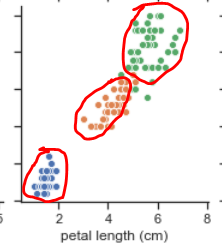
 

For the Wine Dataset, I would choose flavoinoid, proline, and color-intensity.  The plots with these features produced the best clusters. For example below is the plot with flavoinoid(x-axis) and proline (y-axis). I believe 3 clusters are not as obvious if the labels were not already known.  There were no obvious instances of 4 clusters.

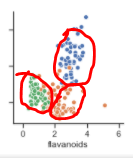


Also, below is a plot with color-intensity(y-axis) and flavoinoid(x-axis.  I belive 3 clusters are not as obvious if the labels were not already known.  There were no obvious instances of 4 clusters.

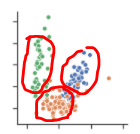

## Problem 5
*Using the scikit-learn class descriptions for Naive Bayes and decision trees,classify the Iris dataset in question 3.* *Your code should be very similar to that in the Module1 Jupyter notebook. In cell 5 the dataset is divided into two* *portions,one for training the other for testing. Make sure you use the same input data for the Naive Bayes classifier and*
*decision tree classifier.
<br><br>Answer the following questions:*
- *Which classifier has the highest performance?*
- *More training helps? Verify by increasing the training dataset size.*
- *Will the performance plateau? Show it on a plot.*

The Decision Tree classifier appears to thave the highest performance overall.  More training helps increase the accuracy of both classifiers as can be seen by increasing the training dataset size for both classifiers below.  The performance does plateau.  For the Decision Tree classifier, the performance plateaus at the 75% training dataset size which has about a 98% accuracy.  For the Naive Baye's classifier, the performance also plateaus at the 75% training data set size which has about 97% accuracy.

In [12]:
#Splitting into training and testing data

#dividing target and features into separate variables
x = iris.data 
y = iris.target

#45%, 55%, 60%, 75%, 85% Training
#setting random set for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.55,random_state=0, shuffle = True)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.45,random_state=0, shuffle = True)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.35,random_state=0, shuffle = True)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.25,random_state=0, shuffle = True)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.15,random_state=0, shuffle = True)

#### Naive Bayes

In [13]:
# Naive Bayes Implementation

#creating Naive Bayes classifier
nb = GaussianNB()

#training model with training sets
nb.fit(x_train, y_train)
nb.fit(x_train2, y_train2)
nb.fit(x_train3, y_train3)
nb.fit(x_train4, y_train4)
nb.fit(x_train5, y_train5)

#predicting response of test dataset
#Naive Bayes
y_pred = nb.predict(x_test)
y_pred2 = nb.predict(x_test2)
y_pred3 = nb.predict(x_test3)
y_pred4 = nb.predict(x_test4)
y_pred5 = nb.predict(x_test5)

nb_accuracy1 = metrics.accuracy_score(y_test, y_pred)
nb_accuracy2 = metrics.accuracy_score(y_test2, y_pred2)
nb_accuracy3 = metrics.accuracy_score(y_test3, y_pred3)
nb_accuracy4 = metrics.accuracy_score(y_test4, y_pred4)
nb_accuracy5 = metrics.accuracy_score(y_test5, y_pred5)

print("Classification Report for Naive Bayes Classifier- 45% Training:",nb_accuracy1)
print("Classification Report for Naive Bayes Classifier- 55% Training:",nb_accuracy2)
print("Classification Report for Naive Bayes Classifier- 65% Training:",nb_accuracy3)
print("Classification Report for Naive Bayes Classifier- 75% Training:",nb_accuracy4)
print("Classification Report for Naive Bayes Classifier- 85% Training:",nb_accuracy5)

Classification Report for Naive Bayes Classifier- 45% Training: 0.9397590361445783
Classification Report for Naive Bayes Classifier- 55% Training: 0.9411764705882353
Classification Report for Naive Bayes Classifier- 65% Training: 0.9622641509433962
Classification Report for Naive Bayes Classifier- 75% Training: 0.9736842105263158
Classification Report for Naive Bayes Classifier- 85% Training: 0.9565217391304348


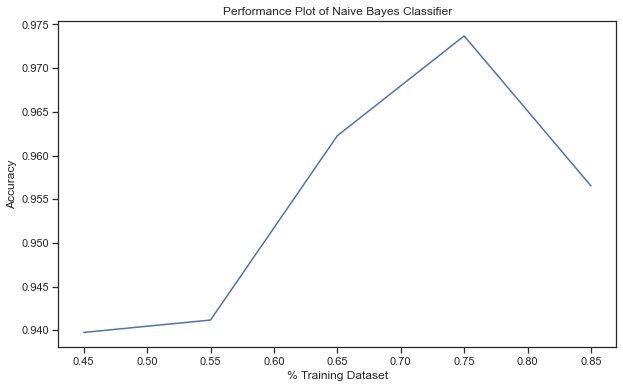

In [14]:
#Performance Plot

training_split = [0.45, 0.55, 0.65, 0.75, 0.85]
accuracy_nb = [nb_accuracy1, nb_accuracy2, nb_accuracy3, nb_accuracy4, nb_accuracy5]

# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(training_split, accuracy_nb)

ax.set(title = "Performance Plot of Naive Bayes Classifier",
       xlabel = "% Training Dataset",
       ylabel = "Accuracy")


plt.show()


#### Decision Tree

In [15]:
# Decision Implementation

#creating Decision Tree classifier - the accuracy percentage of 45% and 55% training were changing when ran 
    #all 4 training percetages together.  This stopped occuring after creating a second classifier
clf = DecisionTreeClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)
clf.fit(x_train2,y_train2)
clf2.fit(x_train3,y_train3)
clf2.fit(x_train4,y_train4)


#Predict the response for test dataset
y2_pred = clf.predict(x_test)
y2_pred2 = clf.predict(x_test2)
y2_pred3 = clf2.predict(x_test3)
y2_pred4 = clf2.predict(x_test4)

clf_accuracy1 = metrics.accuracy_score(y_test, y2_pred)
clf_accuracy2 = metrics.accuracy_score(y_test2, y2_pred2)
clf_accuracy3 = metrics.accuracy_score(y_test3, y2_pred3)
clf_accuracy4 = metrics.accuracy_score(y_test4, y2_pred4)

print("Classification Report for Decision Tree Classifier- 45% Training:",clf_accuracy1)
print("Classification Report for Decision Tree Classifier- 55% Training:",clf_accuracy2)
print("Classification Report for Decision Tree Classifier- 65% Training:",clf_accuracy3)
print("Classification Report for Decision Tree Classifier- 75% Training:",clf_accuracy4)

Classification Report for Decision Tree Classifier- 45% Training: 0.963855421686747
Classification Report for Decision Tree Classifier- 55% Training: 0.9558823529411765
Classification Report for Decision Tree Classifier- 65% Training: 0.9811320754716981
Classification Report for Decision Tree Classifier- 75% Training: 0.9736842105263158


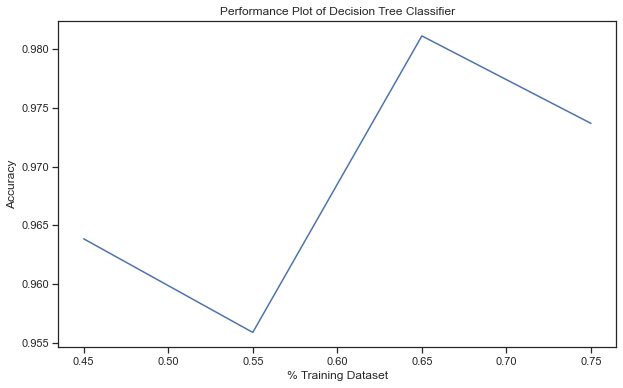

In [16]:
#Performance Plot

training_split2 = [0.45, 0.55, 0.65, 0.75]
accuracy_dt = [clf_accuracy1, clf_accuracy2, clf_accuracy3, clf_accuracy4]

# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(training_split2, accuracy_dt)

ax.set(title = "Performance Plot of Decision Tree Classifier",
       xlabel = "% Training Dataset",
       ylabel = "Accuracy")


plt.show()



## References

https://www.sciencedirect.com/topics/computer-science/discriminative-power

https://www.datacamp.com/community/tutorials/machine-learning-python

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

https://medium.com/analytics-vidhya/machine-learning-starter-with-breast-cancer-detection-ead09f42df5c

https://developer.ibm.com/technologies/artificial-intelligence/articles/cc-unsupervised-learning-data-classification/

https://www.datacamp.com/community/tutorials/categorical-data

https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48

https://scipy-lectures.org/packages/scikit-learn/index.html

https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/customize-plot-colors-labels-matplotlib/

Raschka, Sebastian. Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition (p. 46). Packt Publishing. Kindle Edition. 
